In [2]:
dataset_path = r"C:\Users\DELL\Downloads\Codveta Internship\datasets\House price.csv"

## Task 1: Regression Analysis
-- Description: Perform a simple linear regressionanalysis to predict one variable based on another.

### Objectives:
-- Split the dataset into training and testing sets.
-- Fit a linear regression model using scikit-learn.
-- Interpret the coefficients and evaluate the model usingmetrics such as R-squared and mean squared error.

-- Tools: Python, scikit-learn, pandas



In [3]:
### Importing the Libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')

In [4]:
### Loading dataset
df = pd.read_csv(dataset_path)
df.head()

,area,Year,Rooms,Location,Price,Floor
0,87,1400,2,Marzdaran,1.392000e+10,7.0
1,98,1397,2,Kooy-e Ferdows,1.060000e+10,5.0
2,60,1396,1,Ebrahimabad,1.560000e+10,1.0
3,87,1394,2,Plan & Budget Organization,9.500000e+09,3.0
4,170,1375,3,Formaneya,3.400000e+11,2.0


In [5]:
### Exploring set
print(df.head())

   area  Year  Rooms                    Location         Price  Floor
0    87  1400      2                   Marzdaran  1.392000e+10    7.0
1    98  1397      2              Kooy-e Ferdows  1.060000e+10    5.0
2    60  1396      1                 Ebrahimabad  1.560000e+10    1.0
3    87  1394      2  Plan & Budget Organization  9.500000e+09    3.0
4   170  1375      3                   Formaneya  3.400000e+11    2.0


In [6]:
##### Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      836 non-null    int64  
 1   Year      836 non-null    int64  
 2   Rooms     836 non-null    int64  
 3   Location  836 non-null    object 
 4   Price     835 non-null    float64
 5   Floor     835 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 39.3+ KB


In [7]:
#### Checking missing Values

df.isnull().sum()

area        0
Year        0
Rooms       0
Location    0
Price       1
Floor       1
dtype: int64

In [8]:
### Dataset statistics summary

print("==" * 33)
print("DISPLAY OF DESCRIPTIVE SUMMARY")
df.describe()

DISPLAY OF DESCRIPTIVE SUMMARY


,area,Year,Rooms,Price,Floor
count,836.000000,836.000000,836.000000,8.350000e+02,835.000000
mean,117.248804,1393.556220,2.161483,8.980348e+10,3.813174
std,73.209144,7.958602,0.759136,1.088473e+12,4.261373
min,20.000000,1370.000000,0.000000,1.300000e+07,0.000000
25%,72.000000,1387.000000,2.000000,5.950000e+08,1.000000
50%,103.500000,1395.000000,2.000000,3.905000e+09,3.000000
75%,137.000000,1401.000000,3.000000,2.085500e+10,5.000000
max,980.000000,1402.000000,4.000000,3.000000e+13,30.000000


In [9]:
df['Year'].min() , df['Year'].max()

(np.int64(1370), np.int64(1402))

The Year of dateset considered in between year 1370 to 1402.


In [10]:
### Checking for duplicate
df.duplicated().sum()

np.int64(4)

In [11]:
### Dropping duplicate
df.drop_duplicates(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 832 entries, 0 to 835
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      832 non-null    int64  
 1   Year      832 non-null    int64  
 2   Rooms     832 non-null    int64  
 3   Location  832 non-null    object 
 4   Price     831 non-null    float64
 5   Floor     831 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 45.5+ KB


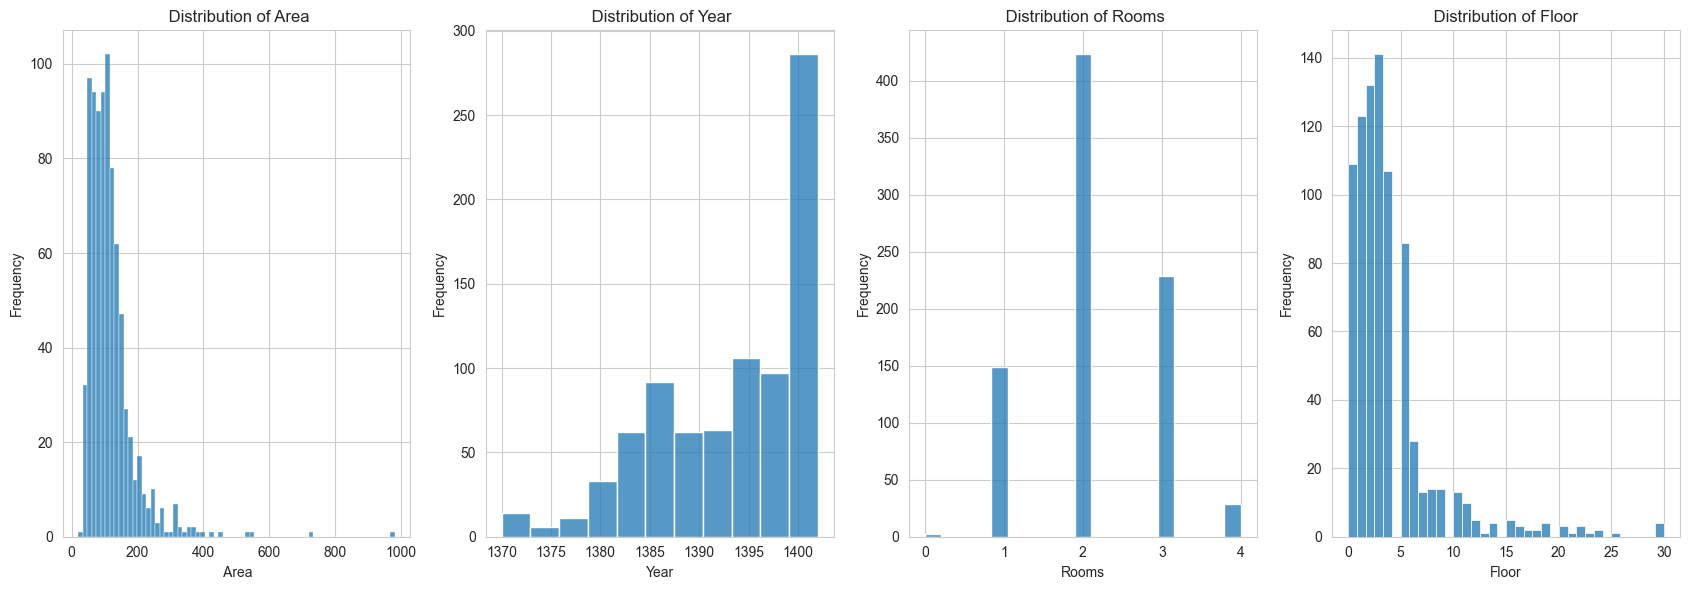

In [13]:
#### Checking eacg=h column distribution
fig,axis = plt.subplots(1, 4, figsize=(17, 6))
sns.histplot(data=df,x='area',ax = axis[0])
axis[0].set_xlabel(" Area")
axis[0].set_ylabel("Frequency")
axis[0].set_title(" Distribution of Area")

sns.histplot(data=df,x='Year', ax = axis[1])
axis[1].set_xlabel("Year")
axis[1].set_ylabel("Frequency")
axis[1].set_title(" Distribution of Year")

sns.histplot(data=df,x='Rooms',ax = axis[2])
axis[2].set_xlabel("Rooms")
axis[2].set_ylabel("Frequency")
axis[2].set_title(" Distribution of Rooms")

sns.histplot(data=df,x='Floor',ax = axis[3])
axis[3].set_xlabel("Floor")
axis[3].set_ylabel("Frequency")
axis[3].set_title(" Distribution of Floor ")

plt.tight_layout()
plt.show()

In [14]:
#### Handling the Missing value
price_median = df['Price'].median()
floor_median = df['Floor'].median()

df['Price'].fillna(price_median,inplace=True)
df['Floor'].fillna(floor_median,inplace=True)

Text(0.5, 1.0, 'Display Outlier in Area')

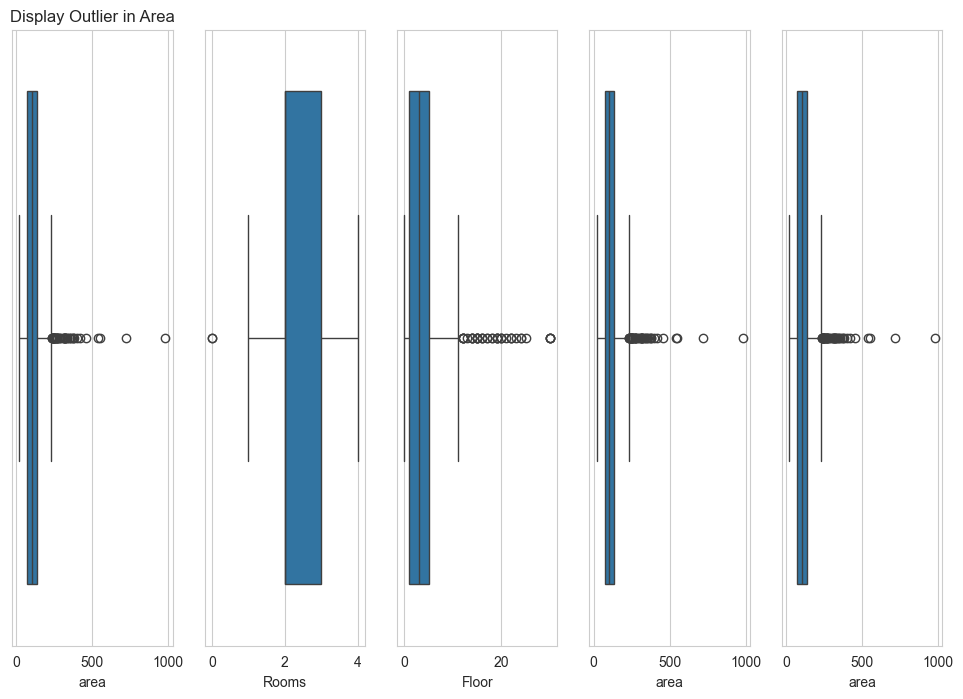

In [15]:
#### Checking for Outliers in the dataset
fig,axis = plt.subplots(1,5,figsize=(12,8))
sns.boxplot(data=df, x ='area',ax=axis[0])
axis[0].set_title("Display Outlier in Area")

sns.boxplot(data=df, x ='Rooms',ax=axis[1])
axis[0].set_title("Display Outlier in Rooms")

sns.boxplot(data=df, x ='Floor',ax=axis[2])
axis[0].set_title("Display Outlier in Floor")

sns.boxplot(data=df, x ='area',ax=axis[3])
axis[0].set_title("Display Outlier in Area")

sns.boxplot(data=df, x ='area',ax=axis[4])
axis[0].set_title("Display Outlier in Area")



In [16]:
#### Handling Outlier

Q1 =df['area'].quantile(0.25)
Q3 =df['area'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - IQR*1.5

upper_bound = Q3 + IQR*1.5

In [17]:
outlier = df[( df['area']<lower_bound) | (df['area']>upper_bound)]

In [18]:
outlier.shape

(46, 6)

In [19]:
df_clean = df[(df['area'] >= lower_bound) & (df['area'] <= upper_bound)]

In [20]:
df_clean.head()

,area,Year,Rooms,Location,Price,Floor
0,87,1400,2,Marzdaran,1.392000e+10,7.0
1,98,1397,2,Kooy-e Ferdows,1.060000e+10,5.0
2,60,1396,1,Ebrahimabad,1.560000e+10,1.0
3,87,1394,2,Plan & Budget Organization,9.500000e+09,3.0
4,170,1375,3,Formaneya,3.400000e+11,2.0


In [21]:
#### Checking the correction to understand the strenght of the columns to predict the price

df.select_dtypes(include='number').corr()

,area,Year,Rooms,Price,Floor
area,1.000000,0.182998,0.721096,0.082602,0.208925
Year,0.182998,1.000000,0.179098,0.050454,0.313556
Rooms,0.721096,0.179098,1.000000,0.091821,0.224178
Price,0.082602,0.050454,0.091821,1.000000,0.015002
Floor,0.208925,0.313556,0.224178,0.015002,1.000000


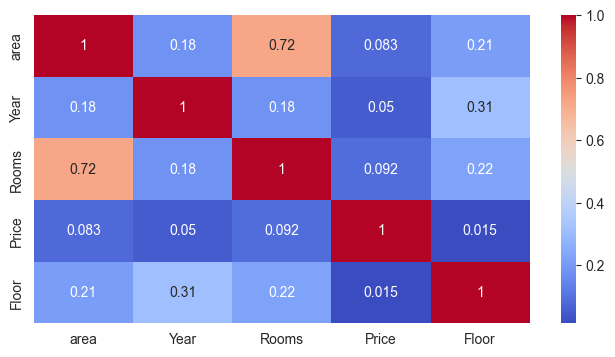

In [22]:
plt.figure(figsize=(8,4))
sns.heatmap(
    df.select_dtypes(include='number').corr(),
    annot=True
    ,cmap='coolwarm'
)
plt.show()

In [23]:
#### Feature Select
X = df.drop(columns = 'Price',axis=1)
y= df['Price']

In [24]:
df.Location.nunique()

305

### What next to do;
1. label encoder the language columns : We'll carry out Target encoding. since the Location cardinality is large. we'll split first before encoding. Carry out on train data only.
we could also use category_encoders.
2. train split and model build
3. model evaluation 

In [25]:
#### Preparing the dataset
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =  train_test_split(
    X, y, random_state= 42, test_size=0.2
)

In [26]:
train_data = X_train.copy()
train_data['Price'] = y_train

location_means = train_data.groupby("Location")['Price'].mean()

In [27]:
location_means 

Location
 13th Aban          1.276000e+10
 Abazar             9.129000e+09
 Abshar             4.000000e+07
 Abshar Tehran      1.239167e+10
 Abshar-e Tehran    4.527500e+10
                        ...     
Shoosh              3.600000e+10
Soleymani           3.050000e+10
Valanjak            7.500000e+11
Vardevardeh         9.180000e+09
Zaferanieh          1.650000e+12
Name: Price, Length: 267, dtype: float64

In [28]:
### Map encoding
X_train['location_encoded'] = X_train['Location'].map(location_means)
X_test['location_encoded'] = X_test['Location'].map(location_means)

In [29]:
X_train.head()

,area,Year,Rooms,Location,Floor,location_encoded
477,182,1400,3,Jannat Abad Markazi,3.0,9.855180e+10
346,73,1395,2,Shahran Jonubi,3.0,3.235000e+10
462,54,1381,1,Kuy-e Ferdows,0.0,4.375857e+09
672,150,1402,3,Yousefabad,5.0,1.905000e+08
302,100,1370,1,Piroozi,0.0,9.389600e+09


In [30]:
#### Selecting the columns in X_train

X_train = X_train.select_dtypes(include='number')
X_test = X_test.select_dtypes(include='number')

In [31]:
### Model Building
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score,mean_squared_error,r2_score


In [32]:
model_reg = LinearRegression()

In [33]:
### Paramter grid

params = {
    'fit_intercept' : [True, False],
    'positive':[True,False]
}

##Gridsearch
grid = GridSearchCV(
    estimator =  model_reg,
    param_grid= params,
    cv = 5,
    scoring = 'r2',
    n_jobs = 1
)

grid.fit(X_train,y_train)

print("Best Parameter: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best Parameter:  {'fit_intercept': True, 'positive': True}
Best score:  -3.152622087652207


In [34]:
model_ridge = Ridge()
params = {
    'alpha':[0.01,0.1,1,10,100],
    'fit_intercept': [True, False],
    'solver': ['auto','svd','cholesky']
}

##Gridsearch
grid = GridSearchCV(
    estimator =  model_ridge,
    param_grid= params,
    cv = 5,
    scoring = 'neg_mean_squared_error',
    n_jobs = 1
)

grid.fit(X_train,y_train)

print("Best Parameter: ", grid.best_params_['alpha'])
print("Best score: ", grid.best_score_)

Best Parameter:  100
Best score:  -1.3974656742385028e+24


In [35]:
X_test.isnull().sum()

area                 0
Year                 0
Rooms                0
Floor                0
location_encoded    43
dtype: int64

In [36]:
### Replacing the Nan in the test dataset with a Global mean
globel_mean = y_train.mean()
X_test['location_encoded'] = X_test['location_encoded'].fillna(globel_mean)

In [37]:
### Linear Regression
model_reg.fit(X_train,y_train)
y_pred = model_reg.predict(X_test)

In [38]:
### Model Evaluation

mean_square_error = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred) 

In [54]:
print("===" * 10)
print("The mean squared error metric: ", mean_square_error)
print("The R2 score of the model: ",r2)
print("===" * 10)

print("The approved r2_score range from (0.7-0.9) in real estate; ")


The mean squared error metric:  3.3658255705943317e+23
The R2 score of the model:  0.03363050132661727
The approved r2_score range from (0.7-0.9) in real estate; 


In [43]:
Prediction_df = pd.DataFrame(columns = ['Actual values','Predicted Value'])

In [45]:
Prediction_df['Actual values'] = pd.Series(y_test).reset_index(drop=True)
Prediction_df['Predicted Value'] = pd.Series(y_pred)

In [46]:
Prediction_df.head()

,Actual values,Predicted Value
0,9.200000e+10,3.560035e+10
1,1.060000e+09,1.383623e+11
2,3.000000e+10,-8.801623e+10
3,3.348500e+09,3.180844e+10
4,1.820000e+09,1.136353e+11


In [52]:
min_val = min(y_test.min(),y_pred.min())
max_val = max(y_test.max(),y_pred.max())

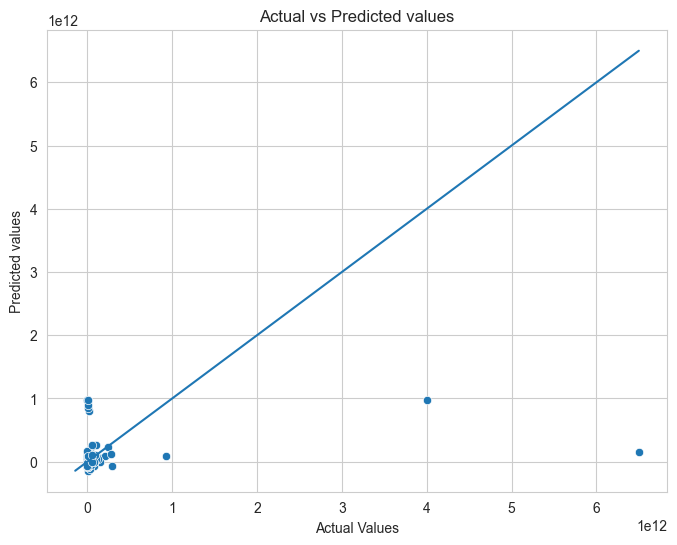

In [53]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = y_test, y=y_pred)

plt.plot([min_val, max_val], [min_val,max_val])

plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted values")

plt.show()

###  Summary:
The points close to the diagonal line indicates Good predictions 

Points far from line indicates a large error.

This Indicates that the model will need to be modified to improve the model performance. The current model performance is good but not good enough. Their room for further improvement of the model by carrying out hyperturning, using other predictive model and increasing the dataset to capture more important features to better train the model for better performance.